In [1]:
!pip install numpy pandas scipy


In [10]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Welcome\Downloads\xy_data.csv")
print(df.head())
print(len(df), "points loaded")


            x          y
0   88.364456  57.784378
1   74.283936  54.406780
2   60.256474  46.311462
3   82.134370  57.717567
4  101.036390  67.849340
1500 points loaded


In [12]:
import numpy as np

n = len(df)
t = np.linspace(6, 60, n)


In [14]:
def model(t, theta, M, X):
    x = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x, y


In [16]:
def objective(params):
    theta, M, X = params
    x_pred, y_pred = model(t, theta, M, X)
    l1 = np.sum(np.abs(x_pred - df['x']) + np.abs(y_pred - df['y']))
    return l1


In [18]:
from scipy.optimize import minimize, Bounds

bounds = Bounds([np.deg2rad(0.1), -0.049, 0.001], [np.deg2rad(49.9), 0.049, 99.999])
initial = [np.deg2rad(25), 0.0, 50.0]

result = minimize(objective, initial, bounds=bounds)
theta_opt, M_opt, X_opt = result.x

print(f"Optimal θ (radians): {theta_opt}")
print(f"Optimal θ (degrees): {np.rad2deg(theta_opt)}")
print(f"Optimal M: {M_opt}")
print(f"Optimal X: {X_opt}")


Optimal θ (radians): 0.49075933316719783
Optimal θ (degrees): 28.118438547135074
Optimal M: 0.021389025805115012
Optimal X: 54.89978442607421


In [19]:
print(
    f"x = t*cos({theta_opt}) - exp({M_opt}*abs(t))*sin(0.3*t)*sin({theta_opt}) + {X_opt}\n"
    f"y = 42 + t*sin({theta_opt}) + exp({M_opt}*abs(t))*sin(0.3*t)*cos({theta_opt})"
)


x = t*cos(0.49075933316719783) - exp(0.021389025805115012*abs(t))*sin(0.3*t)*sin(0.49075933316719783) + 54.89978442607421
y = 42 + t*sin(0.49075933316719783) + exp(0.021389025805115012*abs(t))*sin(0.3*t)*cos(0.49075933316719783)


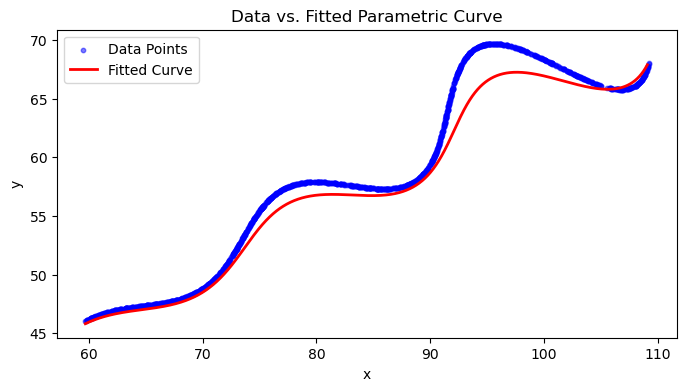

In [22]:
import matplotlib.pyplot as plt

x_fit, y_fit = model(t, theta_opt, M_opt, X_opt)

plt.figure(figsize=(8,4))
plt.scatter(df['x'], df['y'], s=10, color='blue', alpha=0.5, label='Data Points')
plt.plot(x_fit, y_fit, color='red', lw=2, label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data vs. Fitted Parametric Curve')
plt.show()
